<a href="https://www.kaggle.com/taha3012000/omicron?scriptVersionId=88751555" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas_profiling
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/omicron-covid19-variant-daily-cases/covid-variants.csv


In [2]:
data=pd.read_csv("/kaggle/input/omicron-covid19-variant-daily-cases/covid-variants.csv")
data.head()

location        date    variant  num_sequences  perc_sequences  \
0   Angola  2020-07-06      Alpha              0             0.0   
1   Angola  2020-07-06  B.1.1.277              0             0.0   
2   Angola  2020-07-06  B.1.1.302              0             0.0   
3   Angola  2020-07-06  B.1.1.519              0             0.0   
4   Angola  2020-07-06    B.1.160              0             0.0   

   num_sequences_total  
0                    3  
1                    3  
2                    3  
3                    3  
4                    3

In [3]:
data.shape

(100416, 6)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB


No missing values

In [5]:
data.isnull().sum()

location               0
date                   0
variant                0
num_sequences          0
perc_sequences         0
num_sequences_total    0
dtype: int64

In [6]:
data.describe()

num_sequences  perc_sequences  num_sequences_total
count  100416.000000   100416.000000        100416.000000
mean       72.171676        6.154355          1509.582457
std      1669.262169       21.898989          8445.291772
min         0.000000       -0.010000             1.000000
25%         0.000000        0.000000            12.000000
50%         0.000000        0.000000            59.000000
75%         0.000000        0.000000           394.000000
max    142280.000000      100.000000        146170.000000

Chinging to datetime.

In [7]:
data['date'] = data['date'].astype("datetime64")


In [8]:
data['variant'].value_counts()

Alpha             4184
B.1.1.277         4184
others            4184
S:677P.Pelican    4184
S:677H.Robin1     4184
Omicron           4184
Mu                4184
Lambda            4184
Kappa             4184
Iota              4184
Gamma             4184
Eta               4184
Epsilon           4184
Delta             4184
Beta              4184
B.1.620           4184
B.1.367           4184
B.1.258           4184
B.1.221           4184
B.1.177           4184
B.1.160           4184
B.1.1.519         4184
B.1.1.302         4184
non_who           4184
Name: variant, dtype: int64

In [9]:
profile= pandas_profiling.ProfileReport(data)
profile.to_file('file.html')

profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

No. of cases in each country.

In [10]:
df=data[['location','num_sequences_total']]
fig =px.treemap(df,path=[px.Constant('num_sequences_total'),'location'],
                values='num_sequences_total',
                hover_data=['location'], width=1000, height=800)
fig.show()


types of the virus.

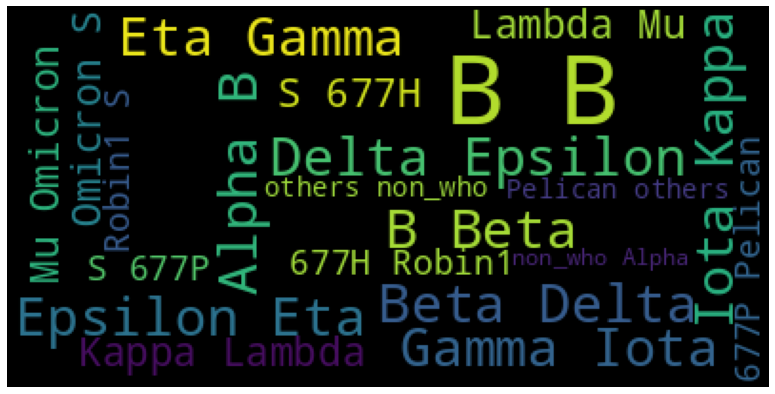

In [11]:
wordCloud = WordCloud(
    background_color='black',
    max_font_size = 50).generate(' '.join(data['variant']))

plt.figure(figsize=(15,7))
plt.axis('off')
plt.imshow(wordCloud)
plt.show()

Example with dump data 

In [12]:
df = px.data.gapminder().query("year == 2007") 
df

country continent  year  lifeExp       pop     gdpPercap  \
11           Afghanistan      Asia  2007   43.828  31889923    974.580338   
23               Albania    Europe  2007   76.423   3600523   5937.029526   
35               Algeria    Africa  2007   72.301  33333216   6223.367465   
47                Angola    Africa  2007   42.731  12420476   4797.231267   
59             Argentina  Americas  2007   75.320  40301927  12779.379640   
...                  ...       ...   ...      ...       ...           ...   
1655             Vietnam      Asia  2007   74.249  85262356   2441.576404   
1667  West Bank and Gaza      Asia  2007   73.422   4018332   3025.349798   
1679         Yemen, Rep.      Asia  2007   62.698  22211743   2280.769906   
1691              Zambia    Africa  2007   42.384  11746035   1271.211593   
1703            Zimbabwe    Africa  2007   43.487  12311143    469.709298   

     iso_alpha  iso_num  
11         AFG        4  
23         ALB        8  
35         DZA       12  
47         AGO       24  
59         ARG       32  
...        ...      ...  
1655       VNM      704  
1667       PSE      275  
1679       YEM      887  
1691       ZMB      894  
1703       ZWE      716  

[142 rows x 8 columns]

In [13]:

fig = px.treemap(df, path=[px.Constant("world"), 'continent', 'country'], values='pop',
                  color='lifeExp',
                  color_continuous_scale='RdBu',
                  color_continuous_midpoint=np.average(df['lifeExp'], weights=df['pop']),width=1000, height=800)
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


In [14]:
countries = data.groupby(['location'])['num_sequences_total'].sum().sort_values(ascending = False).reset_index()

In [15]:
figure = px.choropleth(countries,locations='location', locationmode= 'country names', color= 'num_sequences_total', 
                       hover_name='location', 
                       range_color=[1,10000000],
                       title='Countries with No. of cases')
figure.show()

In [16]:
daily = data.groupby(['date', 'variant'])['num_sequences_total'].sum().sort_values(ascending = False).reset_index() 


Daily number of cases and types of covid

In [17]:
fig = px.bar(daily, x='date', y='num_sequences_total',color="variant")
fig.show()